Affichage du graphique des fonctions d'appartenance...


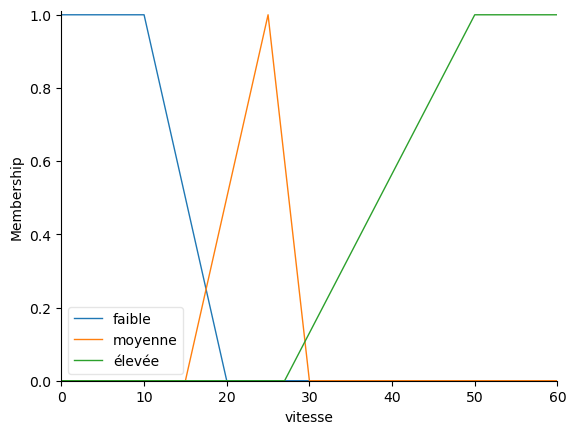


--- Degrés d'appartenance pour la variable 'vitesse' ---

Pour Vitesse = 18:
  μ_faible (Faible) = 0.2000
  μ_moyenne (Moyenne) = 0.3000
  μ_élevée (Élevée) = 0.0000

Pour Vitesse = 28:
  μ_faible (Faible) = 0.0000
  μ_moyenne (Moyenne) = 0.4000
  μ_élevée (Élevée) = 0.0435


In [9]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# 1. Définition de l'univers du discours (de 0 à 60, par pas de 1)
vitesse_universe = np.arange(0, 61, 1)

# 2. Création de la variable d'entrée 'vitesse' (Antecedent)
vitesse = ctrl.Antecedent(vitesse_universe, 'vitesse')

# 3. Définition des fonctions d'appartenance (Membership Functions)
# Basé sur les intervalles Faible, Moyenne et Élevée.

# Faible (Low) : Trapézoïdale de 0 à 20
vitesse['faible'] = fuzz.trapmf(vitesse_universe, [0, 0, 10, 20])

# Moyenne (Average) : Triangulaire de 10 à 50, pic à 30
vitesse['moyenne'] = fuzz.trimf(vitesse_universe, [15, 25, 30])

# Élevée (High) : Trapézoïdale de 40 à 60
vitesse['élevée'] = fuzz.trapmf(vitesse_universe, [27, 50, 60, 60])

# --- TRACÉ DES FONCTIONS D'APPARTENANCE ---
# Cette commande affiche le graphique dans un environnement interactif (Jupyter, Colab).
print("Affichage du graphique des fonctions d'appartenance...")
vitesse.view()
plt.show() # Nécessaire pour afficher si vous n'êtes pas dans un notebook

# 4. Calcul du degré d'appartenance (mu) pour les valeurs 18 et 28

vitesse_valeurs = [18, 28]
print(f"\n--- Degrés d'appartenance pour la variable 'vitesse' ---")

for val in vitesse_valeurs:
    # Interpolation pour trouver les degrés d'appartenance
    mu_faible = fuzz.interp_membership(vitesse_universe, vitesse['faible'].mf, val)
    mu_moyenne = fuzz.interp_membership(vitesse_universe, vitesse['moyenne'].mf, val)
    mu_elevee = fuzz.interp_membership(vitesse_universe, vitesse['élevée'].mf, val)

    print(f"\nPour Vitesse = {val}:")
    print(f"  μ_faible (Faible) = {mu_faible:.4f}")
    print(f"  μ_moyenne (Moyenne) = {mu_moyenne:.4f}")
    print(f"  μ_élevée (Élevée) = {mu_elevee:.4f}")